## Dataset Boston Housing

---

### Bibliotecas utilizadas

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

### Carregando os dados que estão no `sklearn`

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

### Analisando os dados

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
#--- Verificando a dimensão do banco de dados

boston.data.shape

(506, 13)

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
#--- Convertendo para o pandas

dados = pd.DataFrame(boston.data)

dados.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#--- Mudando o nome das colunas

dados.columns = boston.feature_names

dados.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#--- Adicionando o preço da casa

dados["Preço"] = boston.target

dados.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Preço
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Prevendo o preço 

Y - Variável dependente (preço)

X - variáveis independentes (outras características)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X = dados.drop("Preço", axis = 1)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
Y = dados.Preço

Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Preço, dtype: float64

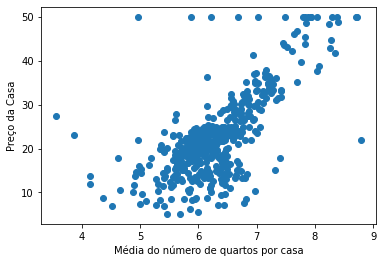

In [13]:
plt.scatter(dados.RM, Y)
plt.xlabel("Média do número de quartos por casa")
plt.ylabel("Preço da Casa")
plt.show()

In [14]:
modelo = LinearRegression()

In [15]:
modelo.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
modelo.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [17]:
modelo.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [18]:
np.mean((dados.Preço - modelo.predict(X)) ** 2)

21.894831181729202

### Divindo o dataset em treino e teste

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, dados.Preço, test_size = 0.3, random_state = 5)

In [21]:
print(x_treino.shape)

(354, 13)


In [22]:
print(x_teste.shape)

(152, 13)


In [23]:
print(y_treino.shape)

(354,)


In [24]:
print(y_teste.shape)

(152,)


In [26]:
modelo = LinearRegression()

In [27]:
modelo.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
pred_treino = modelo.predict(x_treino)

In [29]:
pred_treino

array([11.43089977, 13.71853538, 26.41859051, 31.68658809, 11.05108925,
       24.77287039, 28.95313551, 32.22587554, 15.6177651 , 30.38543468,
        9.99826193, 34.64053591, 25.63945823, 20.24323288, 15.54144862,
       13.0360023 , 30.45219023, 13.26584372, 24.4609007 , 20.5425272 ,
       13.6812139 , 21.84987198, 14.10663647, 18.62709845, 22.16843572,
       33.47913738, 22.3937664 , 16.71951872, 30.89456978, 38.60764037,
       26.50840182, 25.96896355, 15.17045057, 15.84735641, 35.92045455,
       22.7882874 , 33.55299704, 25.26574698, 20.88235588, 17.13362298,
       23.490643  , 19.85788008, 30.32364534, 16.46744125, 25.52727638,
       26.73926876, 23.93506871, 22.78944197, 32.93367439, 18.77301671,
       30.83844599, 28.78217382, 13.33721859, 32.78335066, 27.66370076,
       19.57868458, 35.50253739, 14.34870194, 24.96727711, 28.37058023,
       22.34779744, 18.73440048, 20.95007301, 25.0458343 , 19.9139982 ,
       32.39458176, 23.79711493, 19.4009666 ,  7.01890961,  5.55

In [31]:
pred_teste = modelo.predict(x_teste)

pred_teste

array([37.38997666, 31.56794193, 27.13373886,  6.55117625, 33.69310848,
        5.54919368, 27.10005629, 29.82980986, 26.44622421, 22.38873525,
       32.24739998, 21.74892356, 23.42369575, 33.57974607, 28.31450393,
       15.36502049,  0.17012738, 18.7085528 , 14.6046344 , 10.80263809,
        3.18552876, 19.39248482, 38.33235502, 24.40456217, 31.99950162,
       11.35200963, 24.922899  , 23.39214933, 22.75072363, 21.09584945,
       16.12295584,  7.53544865, 17.59797845, 22.82206974, 29.26790527,
       18.8053497 , 28.33669828,  8.60467923, 41.63227506, 34.1975156 ,
       20.11767808,  4.30987094, 29.61105614, 11.92148423, 27.22215387,
       30.94537934, -6.26468581, 19.96366597, 21.59383857, 13.6435966 ,
       20.49852424, 19.9376828 , 23.65383649, 13.51654696, 17.64433366,
       25.20135154, 35.31489968, 15.25337249, 28.51004736, 21.85251949,
       20.66385004, 26.03157156, 14.71628387, 32.34648274, 20.7126339 ,
       12.16905109, 19.60990611, 25.19479418, 21.78988729, 21.17